# Heart Disease Project
Welcome to the weekly project.

## Project Introduction
This notebook performs the following tasks:
1. Load and explore the dataset.
2. Preprocess and scale the data.
3. Train machine learning models and evaluate their performance.
4. Perform feature importance analysis and visualization.

## Dataset
The dataset that will be used in this task is `heart_disease_health_indicators_BRFSS2015.csv`
https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data

## Import Libraries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


## Load the Data 


In [91]:
# Load the dataset
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!

In [92]:
# 1. Find the dataset information and observe the datatypes
# Dataset Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [93]:
# 2. Check the shape of the data to understand its structure
#Shape of the Dataset:
df.shape

(253680, 22)

In [94]:
# 3. View the data with various functions to get an initial sense of the data
#First Few Rows of the Dataset:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [95]:
# Last Few Rows of the Dataset:
df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [96]:
# Column Names:
print(df.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [97]:
# Sample Data (First 10 Rows):
print(df.sample(10))

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
36549                    0.0     0.0       1.0        1.0  27.0     1.0   
36081                    0.0     0.0       0.0        1.0  23.0     0.0   
175844                   0.0     0.0       1.0        1.0  32.0     1.0   
218408                   0.0     0.0       0.0        1.0  28.0     0.0   
157898                   0.0     1.0       0.0        1.0  25.0     0.0   
172994                   1.0     1.0       0.0        0.0  37.0     1.0   
248729                   0.0     1.0       0.0        1.0  21.0     0.0   
183102                   1.0     1.0       1.0        1.0  22.0     0.0   
193340                   0.0     0.0       1.0        1.0  25.0     0.0   
37122                    0.0     1.0       0.0        1.0  32.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
36549      0.0       0.0           1.0     0.0  ...            1.0   
36081      0.0       0.0          

In [98]:
# 4. Perform summary statistics on the dataset to grasp central tendencies and variability
# Summary Statistics:
df.describe(include='all')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [99]:
# 5. Check for duplicated data
# Number of Duplicated Rows:
df.duplicated().sum()

23899

In [100]:
# 6. Check for null values
# Number of Null Values in Each Column:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [101]:
# For assignment: Use different scalers.
df['BMI'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['BMI']])
df['MentHlth'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['MentHlth']])
df['PhysHlth'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['PhysHlth']])
# for feature in ['BMI', 'MentHlth', 'PhysHlth']: You can use this forloop instead if you wish
scaler = MinMaxScaler(feature_range=(0, 1))

## Feature Selection
Select relevant features for clustering. Explain your choice of features.

In [102]:
# Define predictors and target variable
X = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack']

## Train and Evaluate Models

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_clf.predict(X_test)

# Evaluate the RandomForestClassifier
print("RandomForest Accuracy: {:.4%}".format(accuracy_score(y_test, rf_predictions)))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


RandomForest Accuracy: 90.2751%
[[45265   704]
 [ 4230   537]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45969
         1.0       0.43      0.11      0.18      4767

    accuracy                           0.90     50736
   macro avg       0.67      0.55      0.56     50736
weighted avg       0.87      0.90      0.88     50736



## Evaluation Using K-Fold Cross-Validation
Evaluate the result.

In [104]:
# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=40)
X_numpy = X.to_numpy()

for train_index, test_index in kf.split(X_numpy):
    X_train_kf, X_test_kf = X_numpy[train_index], X_numpy[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate on each fold
    rf_clf_kf = RandomForestClassifier()
    rf_clf_kf.fit(X_train_kf, y_train_kf)
    predictions_kf = rf_clf_kf.predict(X_test_kf)
    
    print("Fold Accuracy: {:.4%}".format(accuracy_score(y_test_kf, predictions_kf)))

Fold Accuracy: 90.3165%
Fold Accuracy: 90.4801%
Fold Accuracy: 90.2653%
Fold Accuracy: 89.9894%
Fold Accuracy: 90.3658%


## Plot the data points with their predicted

In [105]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)
# Default 
# For assignement: Use other metrics for performance and the confusion matrix.
# For assignment: Use multiple models and choose the best performance.


cla = RandomForestClassifier()
cla.fit(X_train, Y_train)

prediction = cla.predict(X_test)

acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.4%}".format(acc))

################# END OF ESSENTIAL CODE, EVERYTHING THAT FOLLOWS WAS FOR DEMONSTRATION AND THE K-FOLD CODE###########

Accuracy: 90.3974%


In [106]:
################# END OF ESSENTIAL CODE, EVERYTHING THAT FOLLOWS WAS FOR DEMONSTRATION AND THE K-FOLD CODE###########

# For demonstration

In [107]:
#For assignment: Train with the folds and get the std

""""
Before using the KFold, make sure that you either convert the X to a numpy array 
Or if you want to use it as a Dataframe, please use df.iloc[indices]

"""
kf = KFold(n_splits=5, shuffle=True)
X_numpy = X.to_numpy()
for train_index, test_index in kf.split(X): #
    # print("TRAIN:", len(train_index), "TEST:", len(test_index))
    print(X.iloc[train_index].shape) # Pandas example 
    print(X_numpy[train_index].shape) # Numpy example
    # X_train, X_test = X[train_index], X[test_index] 
    # y_train, y_test = y[train_index], y[test_index]

(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)
(202944, 21)


In [108]:
# Default 
# For assignement: Use other metrics for performance and the confusion matrix.
# For assignment: Use multiple models and choose the best performance.


cla = RandomForestClassifier()
cla.fit(X_train, Y_train)

RandomForestClassifier()

In [109]:
prediction = cla.predict(X_test)
X_train_pred = cla.predict(X_train)

In [110]:
acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 90.3540%


In [111]:
acc = accuracy_score(Y_train, X_train_pred)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 99.6004%


In [112]:
import numpy as np

importances = cla.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) BMI                            0.192200
 2) Age                            0.110731
 3) Income                         0.103605
 4) PhysHlth                       0.084603
 5) Education                      0.071911
 6) GenHlth                        0.070532
 7) MentHlth                       0.063415
 8) Fruits                         0.032798
 9) PhysActivity                   0.029336
10) Diabetes                       0.028634
11) Veggies                        0.027161
12) Stroke                         0.026798
13) HighBP                         0.026426
14) DiffWalk                       0.025848
15) HighChol                       0.023764
16) Sex                            0.023179
17) Smoker                         0.022859
18) NoDocbcCost                    0.014976
19) HvyAlcoholConsump              0.009443
20) AnyHealthcare                  0.007853
21) CholCheck                      0.003929


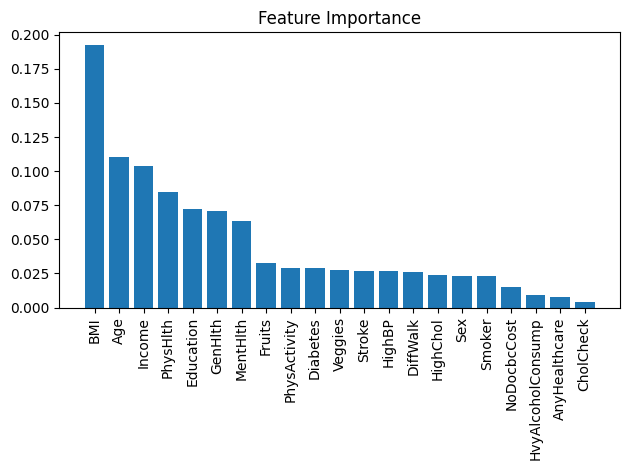

In [113]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [114]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.000000,0.000000,0.000000,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.000000,0.000000,1.000000,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.000000,0.000000,1.000000,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.000000,1.000000,1.000000,1.0
BMI,253680.0,0.190493,0.076845,0.0,0.139535,0.174419,0.220930,1.0
Smoker,253680.0,0.443169,0.496761,0.0,0.000000,0.000000,1.000000,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.000000,0.000000,0.000000,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.000000,0.000000,0.000000,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.000000,1.000000,1.000000,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.000000,1.000000,1.000000,1.0


In [115]:

# Assuming df is your DataFrame
# Replace this with your actual DataFrame loading step
# df = pd.read_csv('your_dataset.csv')

predictors = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target_column = 'HeartDiseaseorAttack'

# Verify that the target column exists
if target_column not in df.columns:
    print(f"Error: The target column '{target_column}' does not exist in the DataFrame.")
else:
    # Extract predictors and target variable
    X = df[predictors].values
    y = df[target_column].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)



In [116]:
 # Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (177576, 21)
X_test shape: (76104, 21)
y_train shape: (177576,)
y_test shape: (76104,)


In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [118]:
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[159618   1233]
 [ 15084   1641]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95    160851
         1.0       0.57      0.10      0.17     16725

    accuracy                           0.91    177576
   macro avg       0.74      0.55      0.56    177576
weighted avg       0.88      0.91      0.88    177576



In [119]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[68383   553]
 [ 6443   725]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     68936
         1.0       0.57      0.10      0.17      7168

    accuracy                           0.91     76104
   macro avg       0.74      0.55      0.56     76104
weighted avg       0.88      0.91      0.88     76104

